Import essential libraries for data handling, visualization, and machine learning:


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('nearest-earth-objects(1910-2024).csv')


In [4]:
df.shape

(338199, 9)

In [5]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


### Checking Missing Values

The code checks for missing values in the dataset:

- `absolute_magnitude`, `estimated_diameter_min`, `estimated_diameter_max` have 28 missing values each.


In [6]:
df.isnull().sum()


neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

### Filtering and Counting Hazardous Asteroids

1. **Filter Hazardous Asteroids**: The code creates a DataFrame `hazardous_asteroids` with only the rows where `is_hazardous` is `True`.
2. **Count Hazardous Asteroids**: It calculates the total number of hazardous asteroids by summing the `is_hazardous` column.
3. **Check Missing Values**: It checks for missing values in the `hazardous_asteroids` DataFrame.


In [10]:
hazardous_asteroids = df[df['is_hazardous'] == True]

In [11]:
hazardous_count = df['is_hazardous'].sum()
hazardous_count

43162

In [12]:
hazardous_asteroids.isnull().sum()


neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

### Pie Chart of Hazardous Asteroids

A pie chart visualizes the distribution of hazardous vs. non-hazardous asteroids:
- **87.2%** are non-hazardous (`False`).
- **12.8%** are hazardous (`True`).


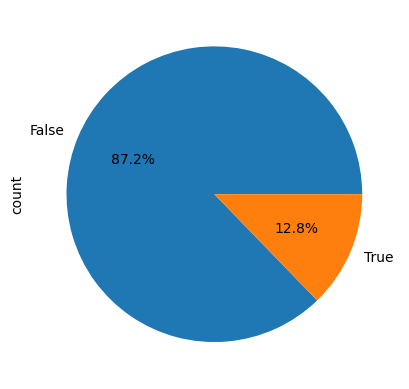

In [6]:
df['is_hazardous'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### Handling Missing Values

Fills missing values in specific columns with the mean of each column:
- `absolute_magnitude`
- `estimated_d


In [ ]:
df['absolute_magnitude'].fillna(df['absolute_magnitude'].mean(), inplace=True)
df['estimated_diameter_min'].fillna(df['estimated_diameter_min'].mean(), inplace=True)
df['estimated_diameter_max'].fillna(df['estimated_diameter_max'].mean(), inplace=True)

In [14]:
df.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

### Check for Duplicates

In [82]:
df.duplicated().sum()

0

### Numerical Summary


In [9]:
numerical_summary = df.describe().transpose()

palette = sns.color_palette()

numerical_summary.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
neo_id,338199.000000,17599388.682019,22872246.428932,2000433.000000,3373980.000000,3742127.000000,54053736.500000,54462807.000000
absolute_magnitude,338171.000000,22.932525,2.911216,9.250000,20.740000,22.800000,25.100000,33.580000
estimated_diameter_min,338171.000000,0.157812,0.313885,0.000511,0.025384,0.073207,0.189041,37.545248
estimated_diameter_max,338171.000000,0.352878,0.701869,0.001143,0.056760,0.163697,0.422708,83.953727
relative_velocity,338199.000000,51060.662908,26399.238435,203.346433,30712.031471,47560.465474,66673.820614,291781.106613
miss_distance,338199.000000,41535350.932190,20773990.246102,6745.532516,24945397.527133,43326743.828348,59339605.219975,74798651.452197


- **Earth**: Present in all rows (338,199 occurrences)

In [8]:
df["orbiting_body"].value_counts()

orbiting_body
Earth    338199
Name: count, dtype: int64

### Feature and Target Variables

- **Features (`X`)**: Drops columns `neo_id`, `is_hazardous`, `name`, and `orbiting_body`.
- **Target (`y`)**: Uses `is_hazardous` as the target variable.


In [61]:
X = df.drop(columns=['neo_id','is_hazardous', 'name','orbiting_body'])
y = df['is_hazardous']

### Standardizing Features

- **Initialize and Apply Scaler**: Standardizes feature values.
- **Convert to DataFrame**: Optional step to convert scaled data back to a DataFrame.


In [46]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)


In [53]:
X_standardized_df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,-1.302784,0.755562,0.755562,0.783537,0.799476
1,-1.522633,1.186882,1.186882,2.230715,0.686711
2,-0.509268,-0.068479,-0.068479,-0.992271,1.235756
3,-0.790949,0.130790,0.130790,1.054176,-0.536196
4,-0.079876,-0.258559,-0.258559,0.188485,1.038958


In [48]:
numerical_summary = X_standardized_df.describe().transpose()

palette = sns.color_palette()

numerical_summary.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
absolute_magnitude,338199.000000,0.000000,1.000001,-4.700136,-0.753162,-0.045524,0.744557,3.657554
estimated_diameter_min,338199.000000,0.000000,1.000001,-0.501163,-0.421919,-0.269552,0.099494,119.116946
estimated_diameter_max,338199.000000,0.000000,1.000001,-0.501163,-0.421919,-0.269552,0.099494,119.116946
relative_velocity,338199.000000,0.000000,1.000001,-1.926472,-0.770805,-0.132587,0.591425,9.118475
miss_distance,338199.000000,0.000000,1.000001,-1.999070,-0.798594,0.086233,0.857047,1.601202


### Distribution Plots

- `absolute_magnitude`
- `estimated_diameter_min`
- `estimated_diameter_max`
- `relative_velocity`
- `miss_distance`


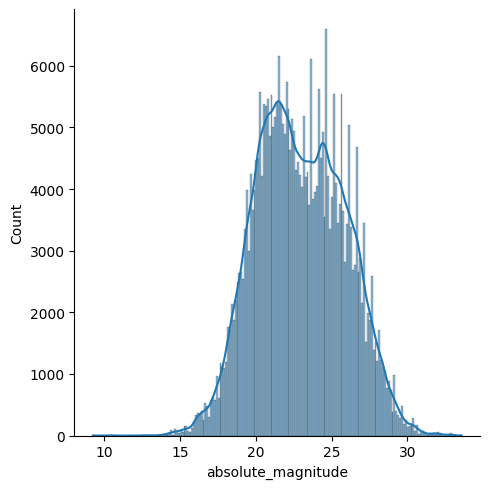

In [24]:
sns.displot(df['absolute_magnitude'],kde=True)

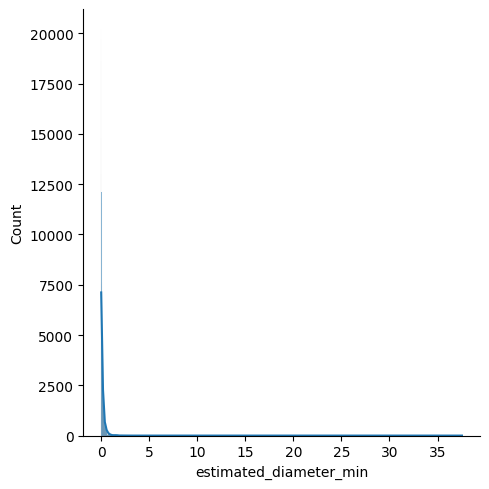

In [22]:
sns.displot(df['estimated_diameter_min'],kde=True)

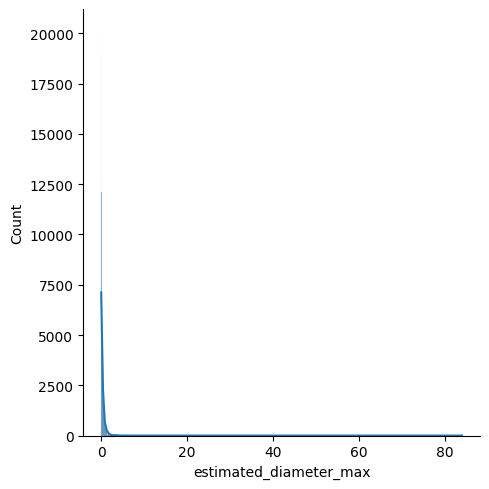

In [23]:
sns.displot(df['estimated_diameter_max'],kde=True)

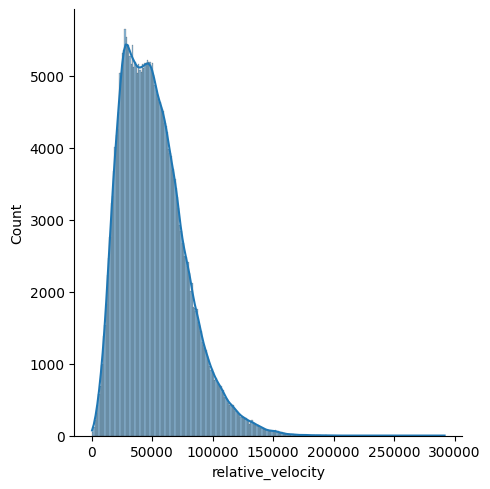

In [25]:
sns.displot(df['relative_velocity'],kde=True)

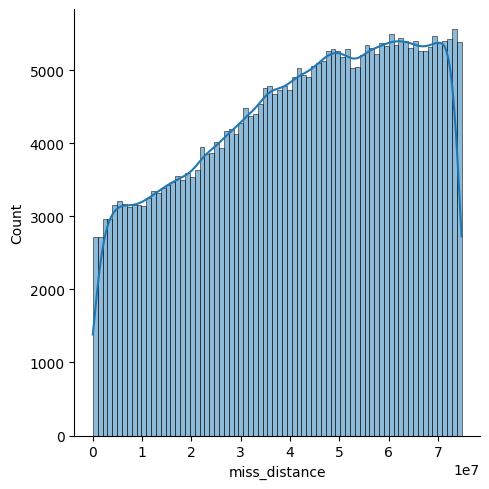

In [26]:
sns.displot(df['miss_distance'],kde=True)

### Feature Selection by Variance

- **Selected Features**: 
  - `absolute_magnitude`
  - `estimated_diameter_min`
  - `estimated_diameter_max`
  - `relative_velocity`
  - `miss_distance`


In [51]:
selector = VarianceThreshold(threshold=0.1)
selected_features_variance = selector.fit_transform(X_standardized_df)

# Get the selected feature names based on the variance threshold
selected_columns_variance = X_standardized_df.columns[selector.get_support()]
print("Features selected by variance:", selected_columns_variance)


Features selected by variance: Index(['absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'relative_velocity', 'miss_distance'],
      dtype='object')


### Encode Target Variable

- **`is_hazardous`**: Transforms `True` to `1` and `False` to `0`.


In [63]:
y = y.map({True: 1, False: 0})

In [70]:
y.unique()

array([0, 1], dtype=int64)

In [74]:
X = X_standardized_df

### Train-Test Split

- **Splits Data**: Divides features (`X`) and target (`y`) into training and test sets.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train:
         absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
183838           -0.629498                0.007482                0.007482   
269345            0.469746               -0.385895               -0.385895   
295431           -0.485222               -0.082256               -0.082256   
73173            -0.790949                0.130790                0.130790   
217719           -0.354687               -0.149769               -0.149769   
...                    ...                     ...                     ...   
119879            0.091881               -0.308791               -0.308791   
259178            1.878153               -0.485099               -0.485099   
131932           -0.746292                0.093973                0.093973   
146867            0.246463               -0.345102               -0.345102   
121958           -1.065760                0.413013                0.413013   

        relative_velocity  miss_distance  
183838    

### Model Insights

- **Logistic Regression**: Good overall accuracy (87.1%) but has low recall for detecting hazardous asteroids (7%).
- **Decision Tree Classifier**: Higher accuracy (88.9%) and better recall for detecting hazardous asteroids (58%), but with a lower ROC-AUC score (0.76) compared to Logistic Regression (0.84).


In [86]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)

# Evaluating Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

# Evaluating Decision Tree
accuracy_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
report_dec_tree = classification_report(y_test, y_pred_dec_tree)
roc_auc_dec_tree = roc_auc_score(y_test, dec_tree.predict_proba(X_test)[:, 1])

In [88]:
# Print results for Logistic Regression
print("Logistic Regression:")
print(f"Accuracy: {accuracy_log_reg}")
print(f"Classification Report:\n{report_log_reg}")
print(f"ROC-AUC Score: {roc_auc_log_reg}")


Logistic Regression:
Accuracy: 0.871732702542874
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     59011
           1       0.48      0.07      0.13      8629

    accuracy                           0.87     67640
   macro avg       0.68      0.53      0.53     67640
weighted avg       0.83      0.87      0.83     67640

ROC-AUC Score: 0.8398650841291576


In [87]:
# Print results for Decision Tree
print("\nDecision Tree Classifier:")
print(f"Accuracy: {accuracy_dec_tree}")
print(f"Classification Report:\n{report_dec_tree}")
print(f"ROC-AUC Score: {roc_auc_dec_tree}")



Decision Tree Classifier:
Accuracy: 0.8890449438202247
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     59011
           1       0.56      0.58      0.57      8629

    accuracy                           0.89     67640
   macro avg       0.75      0.76      0.75     67640
weighted avg       0.89      0.89      0.89     67640

ROC-AUC Score: 0.7562362496811432
